# TECH CHALLENGE | Previsão de Custos Médicos
Este notebook resolve o desafio de prever custos médicos com base em dados demográficos e hábitos dos pacientes.

**Turma 5IADT | Grupo 72:**

- Diego Henrique Silva - RM361935 - diegosource@gmail.com
- Leandro Henrique Cavalcanti Bernardes - RM362274 - leandro.bernardes@hotmail.com
- Paulo César Craveiro - RM363961 - pccraveiro@gmail.com
- Reynaldo Teixeira Santos - RM360956 - reynaldots@gmail.com
- Rodrigo Mendonca de Souza - RM364563 - rodrigo@volus.com

**Técnicas aplicadas:**

- Pré analise dos dados
- Conversão de variáveis categóricas
- Analise dos dados modig=ficados
- Treinamento
    - Modelo Regressão Linear
    - Modelo KNN
    - Modelo Lasso
    - Modelo Ridge
    - Modelo Árvore de Decisão
    - Modelo Floresta Aleatória
- Análise dos resíduos
- Visualizações comparativas e diagnóstico do modelo
- Cross-validation para avaliar robustez
- Salvamento do modelo final

## 📚 Importação de Bibliotecas

Utilizamos algumas bibliotecas em Python para carregar, analisar e treinar os modelos que usaremos nesse desafio.

In [1]:
import pandas as pd                                                             # Para carregar os dados.
import numpy as np                                                              # Para manipular os dados.
import seaborn as sb                                                            # Para fazer os gráficos.
import matplotlib.pyplot as plt                                                 # Para fazer os gráficos.
from scipy import stats                                                         # Para fazer os testes estatísticos.
from sklearn.model_selection import train_test_split                            # Para separação dos dados
from sklearn.preprocessing import StandardScaler                                # Para normalização dos dados.
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet     # Para modelo de machine learning
from sklearn.tree import DecisionTreeRegressor                                  # Para modelo de machine learning
from sklearn.neighbors import KNeighborsRegressor                               # Para modelo de machine learning 
from sklearn.ensemble._forest import RandomForestRegressor                      # Para modelo de machine learning
from sklearn.model_selection import GridSearchCV                                # Para otimização de hiperparâmetros 
from sklearn.metrics import mean_absolute_error, mean_squared_error             # Para calcular o erro quadrático médio
from sklearn.metrics import make_scorer, r2_score                               # Para calcular o erro quadrático médio e o R².       
from sklearn.model_selection import cross_val_score                             # Para validação cruzada
from sklearn.model_selection import KFold                                       # Para validação cruzada

## 📁 Carregamento dos Dados

In [2]:
# Lendo com pandas
dados = pd.read_csv("insurance.csv")


## 📊 Análise Inicial do Dataset

- Quantidade de registros e dimensões.

In [3]:
dados.shape 

(1338, 7)

- Analisando a estrutura da tabela (primeitas linhas)

In [4]:
dados.head(10) 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


- Com o comando describe, geramos estatísticas descritivas para todas as colunas.

In [5]:
dados.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


- Com o comando info, obtemos o número total de entradas, tipos de dados de cada coluna, contagem de valores não nulos e o uso de memória.

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Verificando se há valores nulos

In [7]:
dados.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## 🔄 Conversão de Variáveis Categóricas

- Transformação de Dados Categóricos em Numéricos  
Após a análise da base, precisamos converter algumas colunas não numéricas em valores numéricos. Isso ocorre porque os algoritmos de aprendizado de máquina realizam cálculos matemáticos e estatísticos. Logo, é necessário transformar os dados para que possam ser corretamente interpretados pelo modelo.

In [8]:
dados['sex_value'] = dados['sex'].map({'male': 1, 'female': 0})
dados['smoker_value'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['region_value'] = dados['region'].astype('category').cat.codes

- Analisando como ficou a tabela com as novas colunas

In [9]:
dados.head(10)

,age,sex,bmi,children,smoker,region,expenses,sex_value,smoker_value,region_value
0,19,female,27.9,0,yes,southwest,16884.92,0,1,3
1,18,male,33.8,1,no,southeast,1725.55,1,0,2
2,28,male,33.0,3,no,southeast,4449.46,1,0,2
3,33,male,22.7,0,no,northwest,21984.47,1,0,1
4,32,male,28.9,0,no,northwest,3866.86,1,0,1
5,31,female,25.7,0,no,southeast,3756.62,0,0,2
6,46,female,33.4,1,no,southeast,8240.59,0,0,2
7,37,female,27.7,3,no,northwest,7281.51,0,0,1
8,37,male,29.8,2,no,northeast,6406.41,1,0,0
9,60,female,25.8,0,no,northwest,28923.14,0,0,1


## 📊 Análise Exploratória dos Dados

- Utilizando a biblioteca Seaborn para gerar uma matriz de gráficos de dispersão para visualizar relações entre múltiplas variáveis numéricas

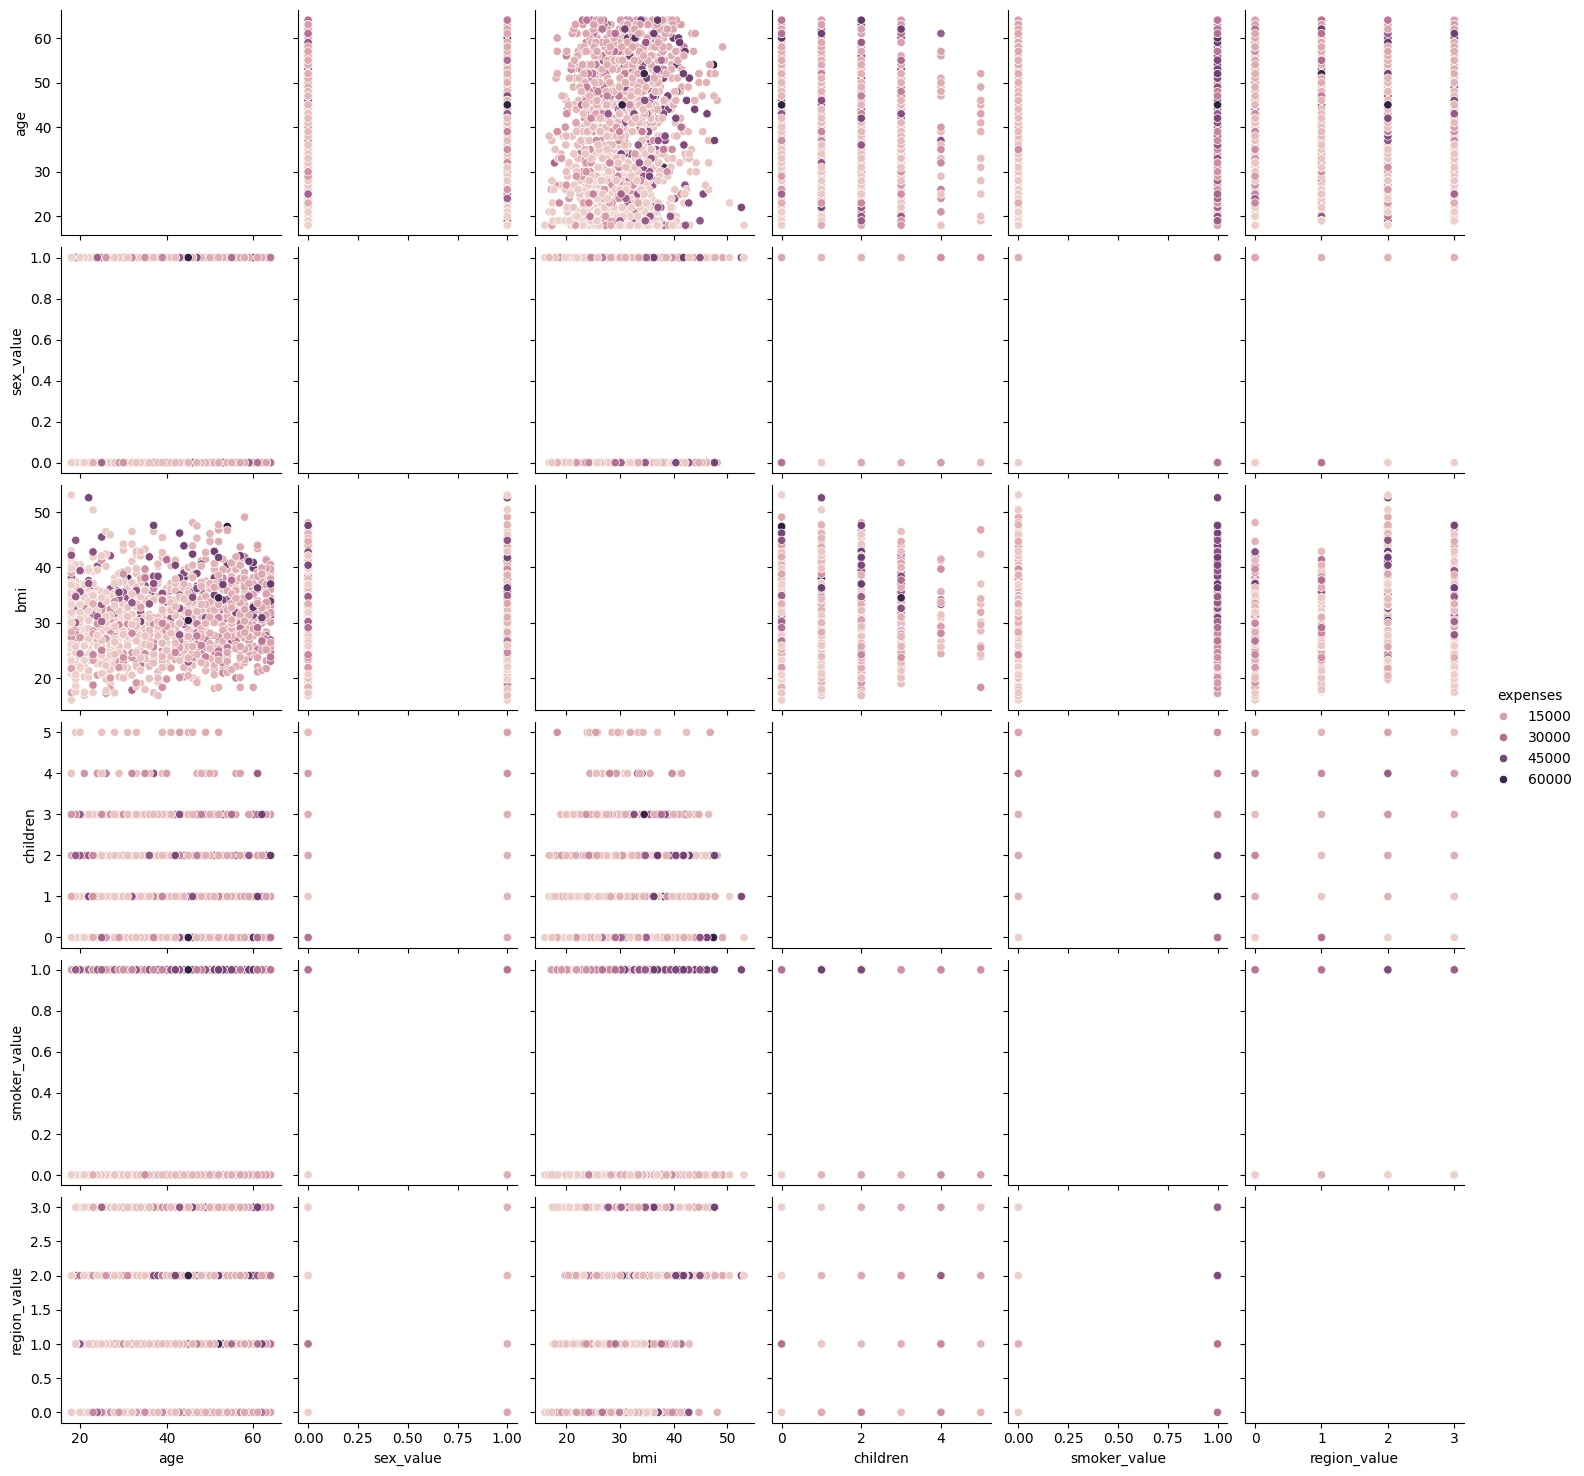

In [10]:
sb.pairplot(dados,vars=['age','sex_value','bmi','children','smoker_value','region_value'],hue="expenses")

- Podemos identificar aumento de preço para fumantes e também uma tendência associada ao IMC.  
- No entanto, esse tipo de gráfico pode não ser ideal para visualizar correlações fracas.

- Para melhorar essa visualização, utilizamos um heatmap do Seaborn, que emprega cores para facilitar a identificação de padrões e dependências. 


<Axes: >

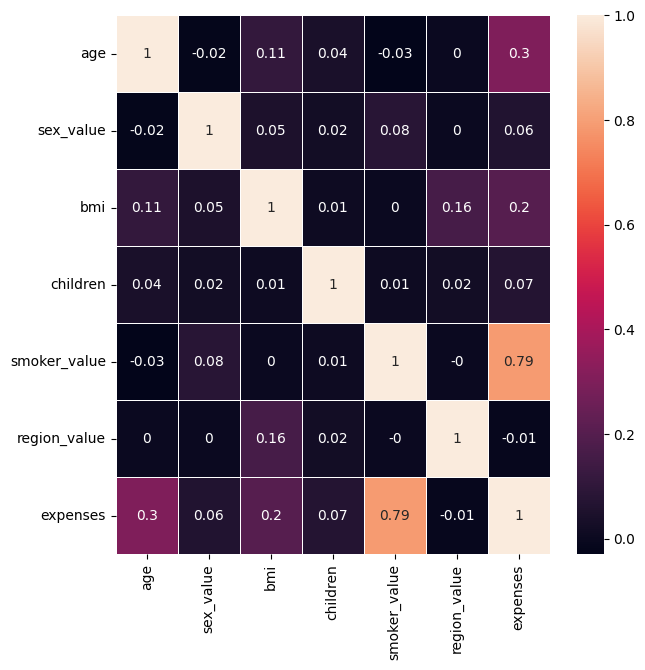

In [11]:
correlation_matrix = dados[['age','sex_value','bmi','children','smoker_value','region_value','expenses']].corr().round(2)
fig, ax = plt.subplots(figsize=(7,7))    
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

- O campo fumante apresenta maior correlação com os custos médicos.  
- Depois, observamos idade e IMC com correlações mais fracas.

- Podemos nos aprofundar na análise com outras visualizações:  

- Boxplot: para observar a distribuição dos custos médicos (`expenses`) por gênero (`sex`). 

<Axes: xlabel='sex', ylabel='expenses'>

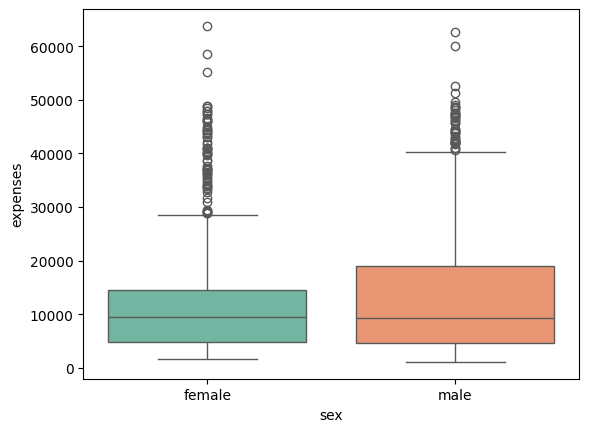

In [12]:
# Analisando valores por genero
sb.boxplot(x='sex', y='expenses', hue='sex', data=dados,palette='Set2')

- Swarmplot: um gráfico de dispersão ajustado que evita sobreposição de pontos, útil para explorar a relação entre idade (`age`) e custos médicos (`expenses`). 

c:\Users\pccra\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='expenses', ylabel='age'>

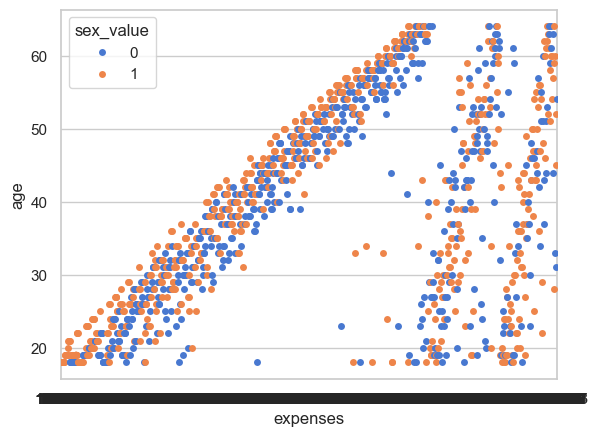

In [13]:
sb.set_theme(style="whitegrid", palette="muted")
sb.swarmplot(data=dados, x="expenses", y="age", hue="sex_value")

## ⚙️ Separação e Padronização dos Dados

- Nesta etapa, estamos preparando os dados para que possam ser utilizados corretamente pelo modelo preditivo.

- Separando variáveis independentes e dependentes:

    - `X`: Contém todas as colunas **exceto** `'expenses'`, pois serão usadas como entrada para o modelo.
    - `y`: Contém apenas a coluna `'expenses'`, que é o alvo a ser previsto.

In [14]:
dados_ajustados = dados[['age','sex_value','bmi','children','smoker_value','region_value','expenses']].copy()
X = dados_ajustados.drop(columns='expenses')
y = dados_ajustados['expenses']

dados_ajustados.head(10)

,age,sex_value,bmi,children,smoker_value,region_value,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
5,31,0,25.7,0,0,2,3756.62
6,46,0,33.4,1,0,2,8240.59
7,37,0,27.7,3,0,1,7281.51
8,37,1,29.8,2,0,0,6406.41
9,60,0,25.8,0,0,1,28923.14


## 🤖 Treinamento do Modelo

Agora entramos na fase crucial do treinamento do modelo! Vamos detalhar os passos:

1. **Separação da base de treino e teste:**  
   - Estamos definindo `X` (`dados_x`), que contém todas as variáveis preditoras, e `y` (`dados_y`), que contém o alvo a ser previsto (`expenses`).
   - A função `train_test_split` do `sklearn.model_selection` separa os dados em **80% para treino e 20% para teste**.
   - O parâmetro `random_state=7` garante que a divisão seja sempre a mesma, permitindo reprodutibilidade dos resultados.

2. **Configuração do K-Fold Cross Validation:**  
   - Utilizamos **validação cruzada K-Fold** para dividir os dados de treino em **5 partes**, permitindo que o modelo seja testado em diferentes subconjuntos e garantindo um desempenho mais confiável.
   - `shuffle=True` embaralha os dados antes de separá-los, tornando a divisão mais equilibrada.

3. **Definição da métrica de desempenho:**  
   - Usamos **R² (coeficiente de determinação)** para medir a qualidade do ajuste do modelo.
   - Quanto maior o valor de `r2_score`, **melhor** a precisão das previsões em relação aos valores reais.

Com esses passos, preparamos o modelo para ser treinado de forma eficiente.

In [15]:
dados_x = dados_ajustados[['age','sex_value','bmi','children','smoker_value','region_value']]
dados_y = dados_ajustados['expenses'] #target

x_train, x_test, y_train, y_test = train_test_split(dados_x, dados_y, test_size=0.2, random_state=7)

# Definindo o número de kfolds com embaralhamento
folds = 5
kfold = KFold(n_splits=folds, shuffle=True)
# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(r2_score, greater_is_better=True)


## Modelo Regressão Linear

1. **Regressão Linear (`LinearRegression`)**  
   - Modelo estatístico simples que assume uma relação linear entre variáveis preditoras e o alvo.
   - Útil para interpretar como cada variável influencia a previsão de custos médicos.
   - **Vantagens:** Fácil de interpretar e rápido para treinar.  
   - **Limitações:** Pode não capturar relações não lineares nos dados.


In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print(f"R²: {r2_lr:.2f}, MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}")
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_lr:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_lr * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

lr_result = cross_val_score(lr, x_train, y_train, cv=kfold, scoring=gs_metric)
lr_result.mean()

R²: 0.76, MAE: 4284.44, MSE: 37674886.33, RMSE: 6137.99
→ Neste caso, o modelo erra em média cerca de R$6137.99 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 76.45% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.728368842752265)

## Modelo KNN

2. **K-Nearest Neighbors (`KNeighborsRegressor`)**  
   - Baseia-se na ideia de encontrar observações mais próximas (`k` vizinhos) para prever um novo valor.
   - Útil para capturar padrões complexos sem pressupor uma relação específica entre variáveis.
   - **Vantagens:** Funciona bem com dados não lineares.  
   - **Limitações:** Pode ser computacionalmente caro em bases grandes.

In [23]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_result = cross_val_score(knn, x_train, y_train, cv=kfold, scoring=gs_metric)

r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"R²: {r2_knn:.2f}, MAE: {mae_knn:.2f}, MSE: {mse_knn:.2f}, RMSE: {rmse_knn:.2f}")
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_knn:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_knn * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

knn_result = cross_val_score(knn, x_train, y_train, cv=kfold, scoring=gs_metric)
knn_result.mean()



R²: 0.18, MAE: 8129.56, MSE: 130872566.30, RMSE: 11439.95
→ Neste caso, o modelo erra em média cerca de R$11439.95 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 18.20% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.019857312771233305)

## Modelo Lasso

3. **Lasso (`Lasso`)**  
   - Variante da regressão linear que usa regularização (`L1`) para reduzir coeficientes de variáveis menos relevantes.
   - Ideal para evitar **overfitting** e selecionar as variáveis mais importantes.
   - **Vantagens:** Remove variáveis irrelevantes automaticamente.  
   - **Limitações:** Pode eliminar variáveis que ainda contribuiriam para a previsão.

In [24]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print(f"R²: {r2_lasso:.2f}, MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}")
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_lasso:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_lasso * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

lasso_result = cross_val_score(lasso, x_train, y_train, cv=kfold, scoring=gs_metric)
lasso_result.mean()


R²: 0.76, MAE: 4284.49, MSE: 37675117.21, RMSE: 6138.01
→ Neste caso, o modelo erra em média cerca de R$6138.01 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 76.45% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.7381543661840716)

## Modelo Ridge

4. **Ridge (`Ridge`)**  
   - Similar ao **Lasso**, mas usa regularização (`L2`), penalizando coeficientes muito grandes sem zerá-los.
   - Útil quando há multicolinearidade (correlação entre variáveis preditoras).
   - **Vantagens:** Evita overfitting sem zerar coeficientes.  
   - **Limitações:** Não faz seleção de variáveis como o **Lasso**.

In [25]:

ridge = Ridge(alpha=0.0001)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"R²: {r2_ridge:.2f}, MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}")
print()
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_ridge:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_ridge * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

ridge_result = cross_val_score(ridge, x_train, y_train, cv=kfold, scoring=gs_metric)
ridge_result.mean()

R²: 0.76, MAE: 4284.44, MSE: 37674892.75, RMSE: 6137.99

→ Neste caso, o modelo erra em média cerca de R$6137.99 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 76.45% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.7445673411491128)

## Modelo Árvore de Decisão

5. **Árvore de Decisão (`DecisionTreeRegressor`)**  
   - Baseia-se em regras de decisão hierárquicas para prever o custo médico.
   - Ótima para capturar relações não lineares entre variáveis.
   - **Vantagens:** Fácil de interpretar e lida bem com interações complexas entre variáveis.  
   - **Limitações:** Tendência ao overfitting se não for bem ajustado.

In [26]:
dtr = DecisionTreeRegressor(random_state=7)
dtr.fit(x_train, y_train)
y_pred_dtr = dtr.predict(x_test)

r2_dtr = r2_score(y_test, y_pred_dtr)
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mse_dtr)

print(f"R²: {r2_dtr:.2f}, MAE: {mae_dtr:.2f}, MSE: {mse_dtr:.2f}, RMSE: {rmse_dtr:.2f}")
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_dtr:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_dtr * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

dtr_result = cross_val_score(dtr, x_train, y_train, cv=kfold, scoring=gs_metric)
dtr_result.mean()

R²: 0.73, MAE: 3110.71, MSE: 43995214.68, RMSE: 6632.89
→ Neste caso, o modelo erra em média cerca de R$6632.89 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 72.50% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.711680423175752)

## Modelo Floresta Aleatória

6. **Floresta Aleatória (`RandomForestRegressor`)**  
   - Conjunto de múltiplas árvores de decisão que melhora a precisão e reduz overfitting.
   - Toma decisões mais robustas e generaliza melhor do que uma única árvore.
   - **Vantagens:** Alto desempenho e estabilidade em diferentes tipos de dados.  
   - **Limitações:** Menos interpretável do que uma única árvore.

In [27]:
rf = RandomForestRegressor(random_state=7)

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_result = cross_val_score(rf, x_train, y_train, cv=kfold, scoring=gs_metric)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"R²: {r2_rf:.2f}, MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"→ Neste caso, o modelo erra em média cerca de R${rmse_rf:.2f} ao prever os custos médicos.")
print("→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.")
print()
print(f"→ O modelo explica aproximadamente {r2_rf * 100 :.2f}% da variância total nos custos médicos.")
print("→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.")

rf_result.mean()

R²: 0.84, MAE: 2880.65, MSE: 25410620.53, RMSE: 5040.89
→ Neste caso, o modelo erra em média cerca de R$5040.89 ao prever os custos médicos.
→ Quanto menor o RMSE, melhor é a precisão do modelo nas previsões.

→ O modelo explica aproximadamente 84.12% da variância total nos custos médicos.
→ Isso significa que a maior parte das variações nos gastos pode ser explicada pelas variáveis de entrada.


np.float64(0.8319583392191617)

## 📈 Gráfico: Reais vs. Previstos

Esse código plota gráficos de dispersão para comparar os valores reais (`y_test`) com os valores previstos por cada modelo. Vamos entender os principais elementos:

Essa abordagem permite visualizar **como cada modelo se comporta**, comparando suas previsões com os valores reais. Se as previsões estiverem próximas da linha vermelha, o modelo tem **bom desempenho**. Caso contrário, pode indicar **erros ou necessidade de ajustes**.

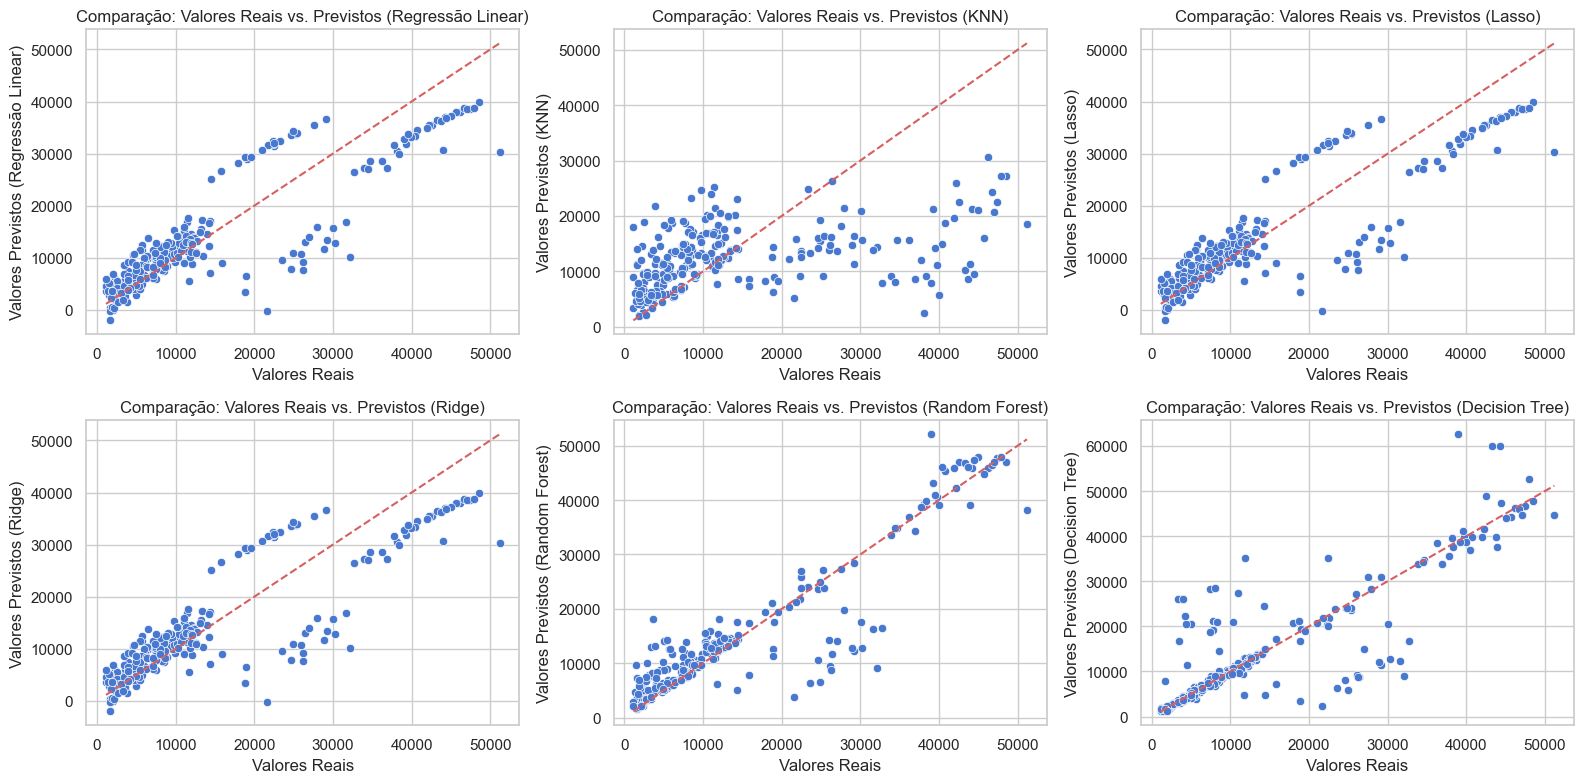

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

sb.scatterplot(x=y_test, y=y_pred_lr, ax=axes[0, 0])
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 0].set_xlabel('Valores Reais')
axes[0, 0].set_ylabel('Valores Previstos (Regressão Linear)')
axes[0, 0].set_title('Comparação: Valores Reais vs. Previstos (Regressão Linear)')
axes[0, 0].grid(True)

sb.scatterplot(x=y_test, y=y_pred_knn, ax=axes[0, 1])
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 1].set_xlabel('Valores Reais')
axes[0, 1].set_ylabel('Valores Previstos (KNN)')
axes[0, 1].set_title('Comparação: Valores Reais vs. Previstos (KNN)')
axes[0, 1].grid(True)

sb.scatterplot(x=y_test, y=y_pred_lasso, ax=axes[0, 2])
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0, 2].set_xlabel('Valores Reais')
axes[0, 2].set_ylabel('Valores Previstos (Lasso)')
axes[0, 2].set_title('Comparação: Valores Reais vs. Previstos (Lasso)')
axes[0, 2].grid(True)

sb.scatterplot(x=y_test, y=y_pred_ridge, ax=axes[1, 0])
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1, 0].set_xlabel('Valores Reais')
axes[1, 0].set_ylabel('Valores Previstos (Ridge)')
axes[1, 0].set_title('Comparação: Valores Reais vs. Previstos (Ridge)')
axes[1, 0].grid(True)

sb.scatterplot(x=y_test, y=y_pred_rf, ax=axes[1, 1])
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1, 1].set_xlabel('Valores Reais')
axes[1, 1].set_ylabel('Valores Previstos (Random Forest)')
axes[1, 1].set_title('Comparação: Valores Reais vs. Previstos (Random Forest)')
axes[1, 1].grid(True)

sb.scatterplot(x=y_test, y=y_pred_dtr, ax=axes[1, 2])
axes[1, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1, 2].set_xlabel('Valores Reais')
axes[1, 2].set_ylabel('Valores Previstos (Decision Tree)')
axes[1, 2].set_title('Comparação: Valores Reais vs. Previstos (Decision Tree)')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()


## 🔍 Análise de Resíduos

Os **resíduos** são calculados como:
```python
residuos = y_test - y_pred
```
Isso significa que estamos verificando **o quanto cada previsão se distancia do valor real**. Se os resíduos forem **próximos de zero e distribuídos normalmente**, indica que o modelo está prevendo bem os custos médicos.

Se os resíduos estiverem **uniformemente distribuídos em torno de zero**, o modelo provavelmente fez boas previsões.  
Se houver **padrões evidentes nos resíduos**, pode indicar que o modelo está cometendo erros sistemáticos.


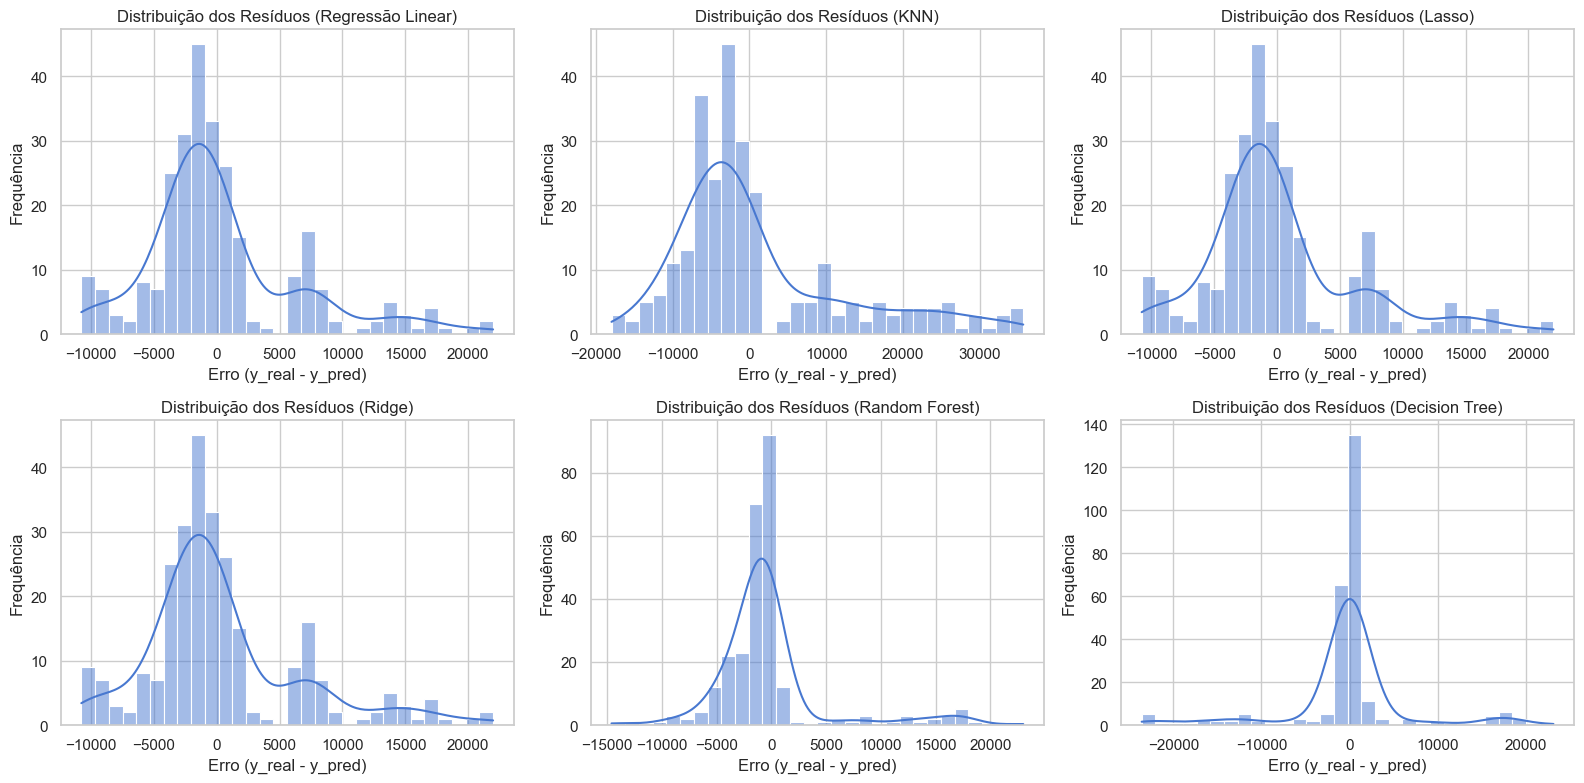

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

residuos_lr = y_test - y_pred_lr
sb.histplot(residuos_lr, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição dos Resíduos (Regressão Linear)')
axes[0, 0].set_xlabel('Erro (y_real - y_pred)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(True)

residuos_knn = y_test - y_pred_knn
sb.histplot(residuos_knn, bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição dos Resíduos (KNN)')
axes[0, 1].set_xlabel('Erro (y_real - y_pred)')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].grid(True)

residuos_lasso = y_test - y_pred_lasso
sb.histplot(residuos_lasso, bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribuição dos Resíduos (Lasso)')
axes[0, 2].set_xlabel('Erro (y_real - y_pred)')
axes[0, 2].set_ylabel('Frequência')
axes[0, 2].grid(True)

residuos_ridge = y_test - y_pred_ridge
sb.histplot(residuos_ridge, bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribuição dos Resíduos (Ridge)')
axes[1, 0].set_xlabel('Erro (y_real - y_pred)')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].grid(True)

residuos_rf = y_test - y_pred_rf
sb.histplot(residuos_rf, bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribuição dos Resíduos (Random Forest)')
axes[1, 1].set_xlabel('Erro (y_real - y_pred)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].grid(True)

residuos_dtr = y_test - y_pred_dtr
sb.histplot(residuos_dtr, bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribuição dos Resíduos (Decision Tree)')
axes[1, 2].set_xlabel('Erro (y_real - y_pred)')
axes[1, 2].set_ylabel('Frequência')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

## 🧠 Coeficientes Aprendidos (Modelos lineares)




=== Regressão Linear ===


smoker_value    23528.578505
children          459.402469
bmi               341.960118
age               251.421718
sex_value        -201.461254
region_value     -356.086505
dtype: float64

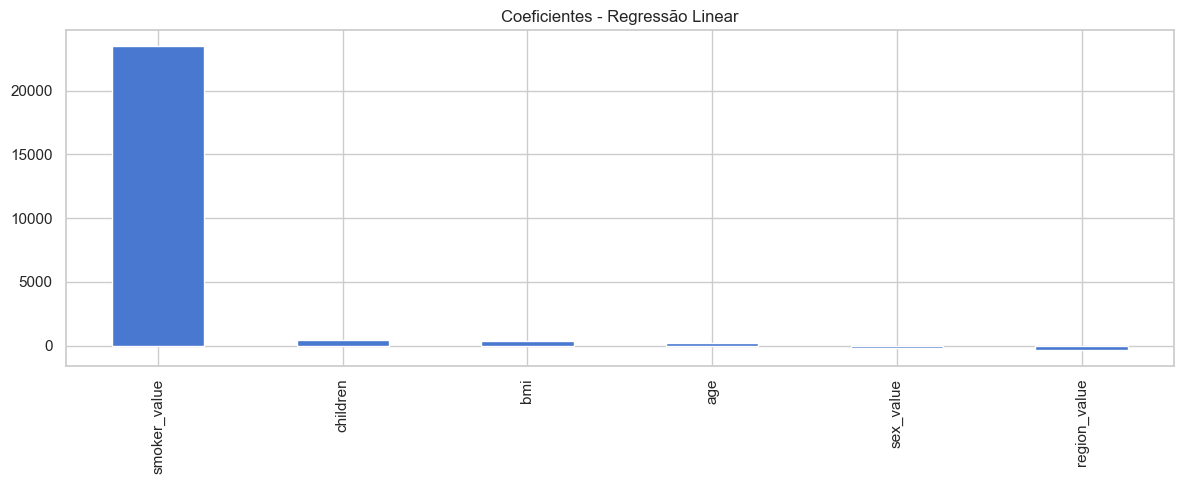


=== Ridge ===


smoker_value    23394.468974
children          458.627656
bmi               341.975029
age               251.246301
sex_value        -192.735454
region_value     -356.544929
dtype: float64

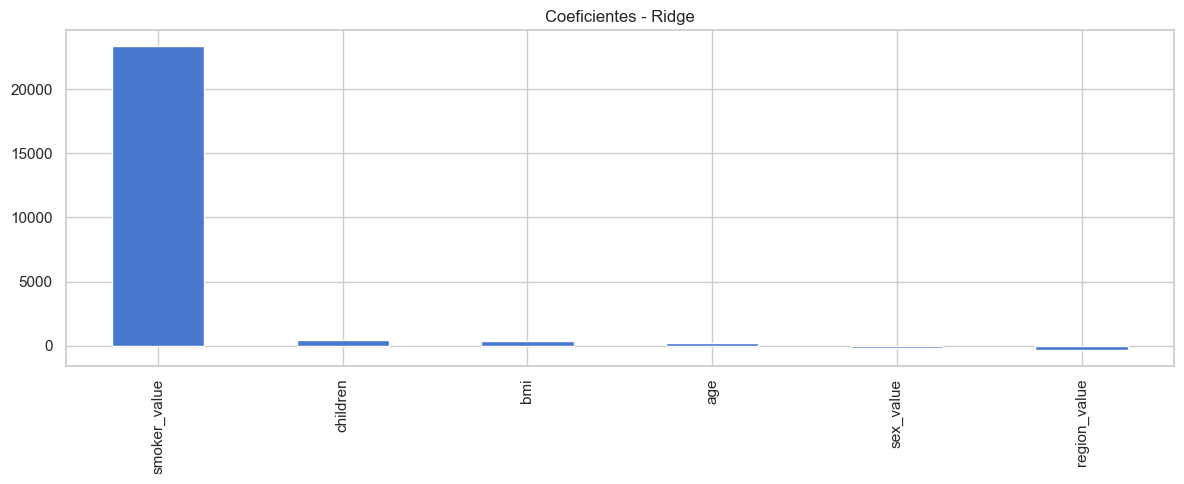


=== Lasso ===


smoker_value    23527.929622
children          459.327340
bmi               341.953142
age               251.421500
sex_value        -201.011905
region_value     -356.001467
dtype: float64

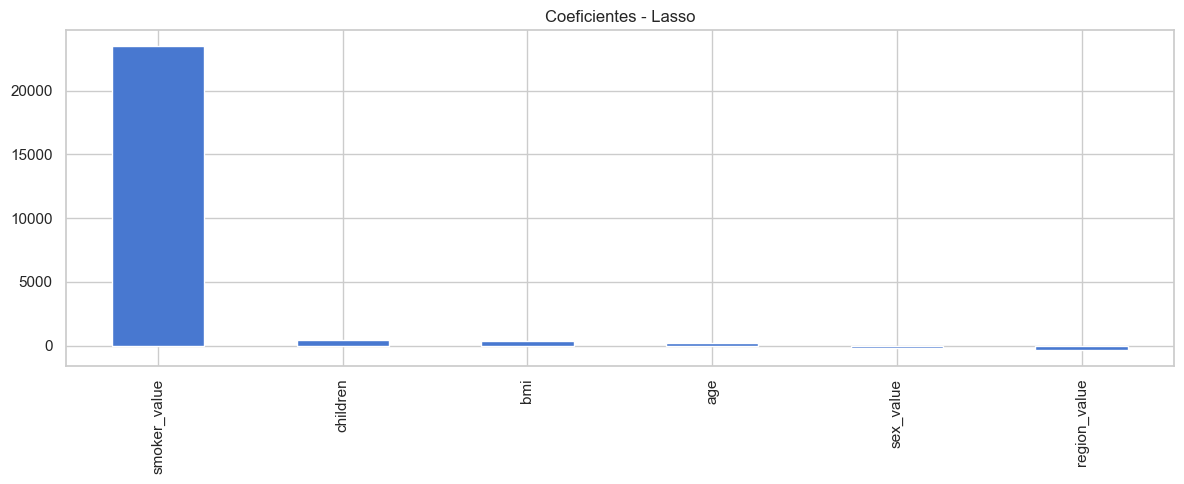

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import matplotlib.pyplot as plt

modelos_lineares = {
    "Regressão Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}

for nome, modelo in modelos_lineares.items():
    modelo.fit(x_train, y_train)
    coef = pd.Series(modelo.coef_, index=X.columns)
    
    print(f"\n=== {nome} ===")
    display(coef.sort_values(ascending=False))
    
    coef.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), title=f'Coeficientes - {nome}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


 ## 🧠 Importância de features (Modelos não lineares)

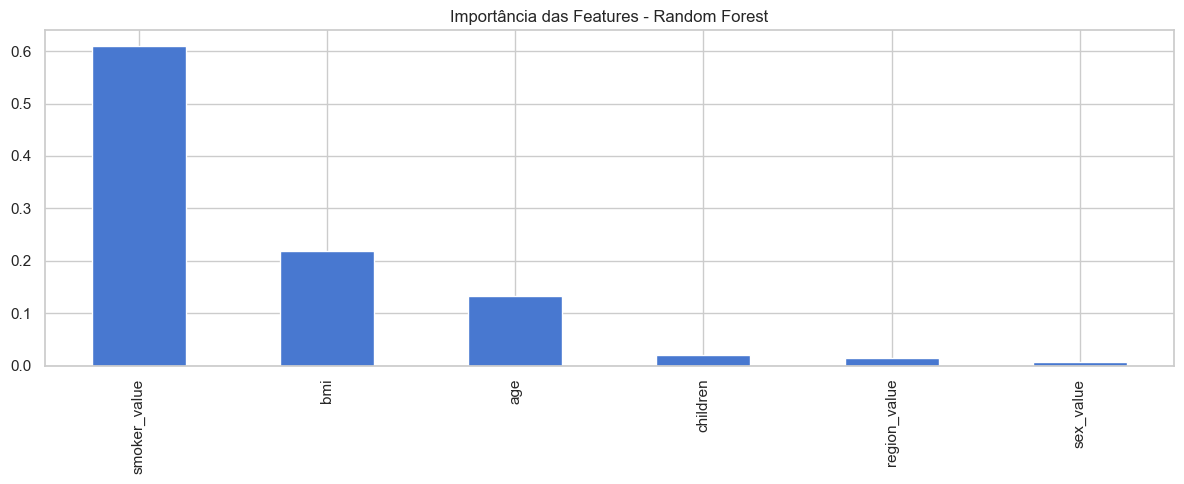

In [32]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor()
modelo_rf.fit(x_train, y_train)

importancia = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancia.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), title='Importância das Features - Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔁 Validação Cruzada

Este código realiza **validação cruzada** (`cross_val_score`) em **seis modelos de regressão** e organiza os resultados em um DataFrame para facilitar a comparação. Vamos detalhar cada etapa:
- **Validação cruzada** divide os dados em múltiplos conjuntos de treino e teste (`cv=5`, ou seja, **5 folds**).
- Cada modelo é treinado em diferentes partes dos dados para evitar **overfitting** e garantir uma avaliação robusta.

Se um modelo tiver um **R² médio alto**, significa que ele explica bem a variabilidade nos custos médicos. Se um modelo tiver **R² muito baixo**, pode indicar que ele não generaliza bem para novos dados.


In [38]:
from sklearn.model_selection import cross_val_score
cv_scores_lt = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
cv_scores_knn = cross_val_score(KNeighborsRegressor(), X, y, cv=5, scoring='r2')
cv_scores_lasso = cross_val_score(Lasso(), X, y, cv=5, scoring='r2')
cv_scores_ridge = cross_val_score(Ridge(), X, y, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring='r2')
cv_scores_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv=5, scoring='r2')

res = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'KNN', 'Lasso', 'Ridge', 'Random Forest', 'Decision Tree'],
    'R² médio (CV)': [cv_scores_lt.mean(), cv_scores_knn.mean(), cv_scores_lasso.mean(), cv_scores_ridge.mean(), cv_scores_rf.mean(), cv_scores_dtr.mean()]
})

res = res.sort_values(by='R² médio (CV)', ascending=False)
print(res)


             Modelo  R² médio (CV)
4     Random Forest       0.835591
2             Lasso       0.747280
0  Regressão Linear       0.747272
3             Ridge       0.747262
5     Decision Tree       0.715239
1               KNN       0.097071


## 💾 Salvando o Modelo Treinado

In [39]:
import joblib
joblib.dump(dtr, 'modelo_dtr_treinado.pkl')

['modelo_dtr_treinado.pkl']

## ✅ Conclusões
- O modelo Floresta Aleatóia (Random Forest) teve o melhor desempenho
- A regularização ajudou a evitar overfitting.
- A variável `smoker` foi a mais influente, seguida por `age` e `bmi`.
- A validação cruzada confirmou que o modelo é robusto.
- Modelo salvo e pronto para ser reutilizado ou publicado em um pipeline.